# Laboratory 1

Hello and welcome to your first laboratory! :)

This is an introductory session to Python and a few libraries that we'll frequently use in this course (numpy, matplotlib, opencv, keras). 

After completing this session, you will:
* gain some basic image manipulation skills
* be able to vectorize code (avoid using for loops)
* get familiar with the concept of broadcasting in numpy

For some of the exercises you'll have the expected output displayed just below the cell, so that you can check if your output is correct.


In [ ]:
# library imports
import cv2
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook


In [ ]:
!wget "http://drive.google.com/uc?export=download&id=1fRvlErNtIV-HX9Vat0I6FINBXEafeDC7" -O dance_moves.png
!wget "https://docs.google.com/uc?export=download&id=1zjltpYscUqnDSP6eUlU-gecadGXvQtTz" -O cute_cat.jpg
!wget "http://drive.google.com/uc?export=download&id=1y46KaIsyhgh030Zi9eoAYfO_ezkE4CY3" -O axes.jpg
!wget "http://drive.google.com/uc?export=download&id=11Jzu1t1RVXMWxp0OK3KJaUgKv9exqv2O" -O sum0.jpg
!wget "http://drive.google.com/uc?export=download&id=1LUYh0HtP6Vd2eq7rPXOhXjBKXlvU--L5" -O sum1.jpg
!wget "http://drive.google.com/uc?export=download&id=1q_BsBdLZXxA2fkrY1WXWn8B5RGOFBLUd" -O concat0.jpg
!wget "http://drive.google.com/uc?export=download&id=1491c1NZQMOnHlvVp6eiiIl2l1wYO6o56" -O concat1.jpg

--2022-01-10 12:12:58--  http://drive.google.com/uc?export=download&id=1fRvlErNtIV-HX9Vat0I6FINBXEafeDC7
Resolving drive.google.com (drive.google.com)... 142.250.157.102, 142.250.157.139, 142.250.157.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.102|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?export=download&id=1fRvlErNtIV-HX9Vat0I6FINBXEafeDC7 [following]
--2022-01-10 12:12:58--  https://drive.google.com/uc?export=download&id=1fRvlErNtIV-HX9Vat0I6FINBXEafeDC7
Connecting to drive.google.com (drive.google.com)|142.250.157.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ak110sj6onurkmg90gshchuk3pgbpokf/1641816750000/02075498819312407694/*/1fRvlErNtIV-HX9Vat0I6FINBXEafeDC7?e=download [following]
--2022-01-10 12:12:59--  https://doc-0g-38-docs.googleuserco

# *numpy*

We'll frequently use the *numpy* library for this lecture; *numpy* is perhaps the most popular library used for scientific computing in Python. *numpy* works with multidimensional arrays, and provides several operations to efficiently manipulate these arrays.

An array contains elements of the same type, arranged in a grid of values. An array can be accessed by a tuple of non-negative integers, by booleans, by another array, or by integers, as we'll see later in this laboratory.

An array is described by its:
- rank - the number of dimensions of the array
- shape - a tuple that specifies the size of the array along each dimension
- type - the library provides several numeric datatypes (uint8, float32, int32 etc.)

There are several ways you can create an array in numpy:

In [ ]:
# create an array with rank 1
a = np.array([1, 2, 3])   
print('a is a numpy array ', type(a))            
print('the shape of a is ', a.shape, ' and its rank is ', len(a.shape))
print('the type of the elements stored in a is ', a.dtype)
print('---')
b = np.array([[1.0, 2, 3],[4, 5, 6]])   
print('the shape of b is ', b.shape, ' and its rank is ', len(b.shape))
print('the type of the elements stored in b is ', b.dtype) 
print('---')
# numpy automatically determines the type of the elements that will be stored in the array
# but you can also specify the type in the constructor
c = np.array([[[0]]], dtype=np.uint8)
print('the shape of c is ', c.shape, ' and its rank is ', len(c.shape))
print('the type of the elements stored in c is ', c.dtype) 

a is a numpy array  <class 'numpy.ndarray'>
the shape of a is  (3,)  and its rank is  1
the type of the elements stored in a is  int64
---
the shape of b is  (2, 3)  and its rank is  2
the type of the elements stored in b is  float64
---
the shape of c is  (1, 1, 1)  and its rank is  3
the type of the elements stored in c is  uint8


In [ ]:
# there are also other array constructors that you might find useful
a = np.zeros(shape=(1, 2)) # creates an array filled with 0s of shape (1, 2) - 1 row, two columns
print('zeros array {} of shape {}'.format(a, a.shape))

b = np.ones((224, 224, 3), dtype=np.uint8) # creates an array filled with ones of shape (224, 224, 3) and type uint8

c = np.full((4, 4, 3), 255) # creates an array filled with 255 of shape (4, 4, 3) 

d = np.eye(3) # creates an identity matrix of size (3x3)
print('identity matrix of size 3x3 ', d)

r = np.random.random(10) # creates an array of 10 elements, filled with random values
print('array of 10 random elements ', r)

zl = np.zeros_like(r) # create a new array with the same shape as r, but filled with 0 values



zeros array [[0. 0.]] of shape (1, 2)
identity matrix of size 3x3  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
array of 10 random elements  [0.19466704 0.61890306 0.49714271 0.12221833 0.44304101 0.31508755
 0.20981777 0.45125416 0.35891314 0.0438427 ]


## Indexing

In [ ]:
a = np.array([1, 2, 3])
print('a is ', a)
a[2] = 4
print('Set the 2nd element to 4')
print('Modified a is:')
print(a)

print('---')
b = np.eye(3)
b[1, 1] = 2
print('Modified b is')
print(b)

# you can use normal integer indexing
print('The first row of b is: ', b[0])
print('The second element from the second row of b is ', b[1, 1]) 

a is  [1 2 3]
Set the 2nd element to 4
Modified a is:
[1 2 4]
---
Modified b is
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]]
The first row of b is:  [1. 0. 0.]
The second element from the second row of b is  2.0


Similar to python lists, *numpy* allows you to <i>slice</i> the array; this is just a  flexible way to access subarrays.

In [ ]:
# slicing
a = np.arange(1, 10, 1) # returns an array with evenly spaced values in the interval [1, 10), with a step of 1
[1, 2, 3, 4, ..., 9]
print('a is \n', a)
print('a[3:6] is \n', a[3:6])   # get a slice from index 3 to 6 (exclusive)
print('a[3:] is \n', a[3:])    # get a slice from index 3 to the end
print('a[:3] is \n', a[:3])    # get a slice from the start to index 3 (exclusive)
print('a[4:-1] is \n', a[4:-1])  # get a slice from index 4 start to the last element of the array (exclusive)

print('---')

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('a: ', a)

## ATTENTION! a slice is just a view on an array, so it points to the same data
# modifying it, it will modify the original array
r = a[:1,:]
print('row1:',  r)
print('a[0][0]: ', a[0, 0])
print('r[0][0]: ', r[0, 0])
print('r[0, 0] = 100')
r[0, 0] = 100
print('row1:',  r)
print('a[0][0]: ', a[0, 0])
print('r[0][0]: ', r[0, 0])


a is 
 [1 2 3 4 5 6 7 8 9]
a[3:6] is 
 [4 5 6]
a[3:] is 
 [4 5 6 7 8 9]
a[:3] is 
 [1 2 3]
a[4:-1] is 
 [5 6 7 8]
---
a:  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
row1: [[1 2 3 4]]
a[0][0]:  1
r[0][0]:  1
r[0, 0] = 100
row1: [[100   2   3   4]]
a[0][0]:  100
r[0][0]:  100


*numpy* also support integer array indexing.

Attention, there is a slight (and important) difference when using integer array indexing: when using slicing, the result will also be a subarray of the existing array (a view on the existing array), while integer array indexing allows you to create new arrays based on the the data in the original array.

In [ ]:
a = np.array(np.arange(0, 6, 1))
indices = [0, 2, 4] 
b = a[indices] # this will get the elements from the indices 0, 2, 4 from the array a
print('original array: \n', a)
print('The elements in a from the indices', indices, 'are: \n', b)
print('---')

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
indices = [[0, 1, 2], [2, 1, 0]] # this will get the elements from the indices (0, 2), (1, 1) and (2, 0) from the array a
b = a[tuple(indices)]  # b will be [3, 6, 9]
print('original array: \n', a)
print('The elements in the array at indices', indices, 'are: \n', b)

print('---')
# modifying this array, won't modify the original array
print(b)
b[0] = 100
print('b[0] = 100')
print('a = ', a)
print('b = ', b)

print('---')
print('More array indexing examples: ')
# with array indexing you can reuse the same index from the original array
b = a[[0, 0], [1, 1]]
print('b = ', b)
#  equivalent to 
b = [a[0, 1], a[0, 1]]
print('b = ', b)

print('---')
print('Using array indexing to modify an element from each row in a matrix: ')
# modifing an element from each row in a matrix
ind = np.array([1, 0, 1])
a[np.arange(3), ind] = -100
print(a)




original array: 
 [0 1 2 3 4 5]
The elements in a from the indices [0, 2, 4] are: 
 [0 2 4]
---
original array: 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
The elements in the array at indices [[0, 1, 2], [2, 1, 0]] are: 
 [3 6 9]
---
[3 6 9]
b[0] = 100
a =  [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b =  [100   6   9]
---
More array indexing examples: 
b =  [2 2]
b =  [2, 2]
---
Using array indexing to modify an element from each row in a matrix: 
[[   1 -100    3    4]
 [-100    6    7    8]
 [   9 -100   11   12]]


Array indexing can be mixed with slicing. When using slicing the resulting array will have the same rank as the original array, while when using array indexing you will get an array with a lower rank than the original array.

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
last_row_indexing = a[-1, :]
last_row_slicing = a[2:3, :]
print('Last row obtained with array indexing:\n', 
      last_row_indexing, 'has shape:', last_row_indexing.shape)
print('Last row obtained with array slicing:\n', 
      last_row_slicing, 'has shape:', last_row_slicing.shape)

Last row obtained with array indexing:
 [ 9 10 11 12] has shape: (4,)
Last row obtained with array slicing:
 [[ 9 10 11 12]] has shape: (1, 4)


*numpy* also allows you to use boolean array indexing, in which an array of booleans is used as a mask to select arbitrary elements in the array.

In [ ]:
a = np.array([11, 12, 13, 14])
indices = (a > 12)
# a > 12 returns an array of boolean of the same size as a;
# an element in this array is True is the element stored in the same position in a is larger than 12

print('a>12:\n', indices)
print('The numbers larger than 12 in a are:\n', a[indices])

a>12:
 [False False  True  True]
The numbers larger than 12 in a are:
 [13 14]


## array operations
*numpy* provides functions and operator overload for various arithmetical operations on the arrays, such addition, subtraction, multiplication, dot products etc.


*Attention!!* **np.multiply** performs elementwise multiplication. If you want to perform matrix multiplication, you should use the **np.dot** function *!!*

In [ ]:
a = np.array([[1, 2], 
             [3, 4]])
b = np.array([[11, 12],
             [13, 14]])

print('a is: ', a)
print('b is: ', b)
# elementwise operations
print('a+b is: \n', a + b)
print('a+b is: \n', np.add(a, b))

print('a-b is: \n', a - b)
print('a-b is: \n', np.subtract(a, b))

print('The maximum element in a is :', np.amax(a))
print('The position of this element in a is :', np.argmax(a)) # by default it returns the max in the flattened array

print('|a-b| is: \n', np.abs(a - b))

print('a*b (element wise) is: \n', a*b)
print('a*b (element wise) is: \n', np.multiply(a, b))

v = np.array([10, 20])
w = np.array([11, 11])
print('Dot product v x w is:\n', v.dot(w))
print('Dot product v x w is:\n', np.dot(v, w))

print('Dot product a x v (matrix x vector) is:\n', a.dot(v))

print('Dot product a x b (matrix x matrix) is:\n', a.dot(b))

a is:  [[1 2]
 [3 4]]
b is:  [[11 12]
 [13 14]]
a+b is: 
 [[12 14]
 [16 18]]
a+b is: 
 [[12 14]
 [16 18]]
a-b is: 
 [[-10 -10]
 [-10 -10]]
a-b is: 
 [[-10 -10]
 [-10 -10]]
The maximum element in a is : 4
The position of this element in a is : 3
|a-b| is: 
 [[10 10]
 [10 10]]
a*b (element wise) is: 
 [[11 24]
 [39 56]]
a*b (element wise) is: 
 [[11 24]
 [39 56]]
Dot product v x w is:
 330
Dot product v x w is:
 330
Dot product a x v (matrix x vector) is:
 [ 50 110]
Dot product a x b (matrix x matrix) is:
 [[37 40]
 [85 92]]


## numpy axes

Another concept that is perhaps confusing for beginners in numpy is the concept of axes. As you'll see several mathematical functions (**np.sum**, **np.mean**, **np.min** etc.) require you to specify the axis along the operation should be applied.

Just as the cartesian coordinate system, numpy arrays have axes. For example, for a 2D array, the rows are the first axis (0 axis), and the columns are the second axis (axis 1).



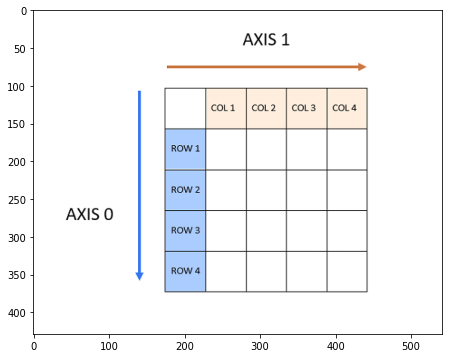

In [ ]:
img_axes = cv2.imread('axes.jpg')
dpi = plt.rcParams['figure.dpi']

height, width, depth = img_axes.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(img_axes)

Is is important to understand, for each operation, what the axis element controls.

For the common matemathical operations, which for example aggregate your data, the axis parameter controls which axis will be collapsed.
So, for example, if you have an array a, and you perform the operation np.sum(a, axis = 0), the rows will be collapsed and this will sum down the columns. (It will not sum the rows).


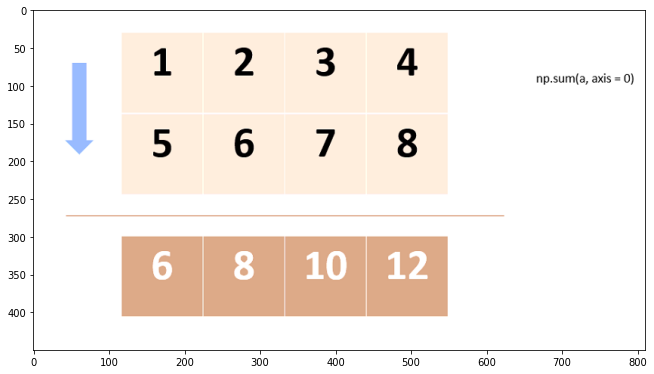

In [ ]:
img_sum0 = cv2.imread('sum0.jpg')
dpi = plt.rcParams['figure.dpi']

height, width, depth = img_sum0.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(img_sum0)

Similarly, if you have an array a, and you perform the operation np.sum(a, axis = 1), the columns will be collapsed and this will sum down the rows. (It will not sum the columns).


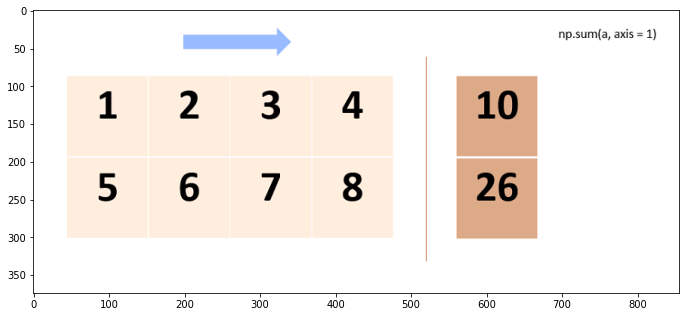

In [ ]:
img_sum1 = cv2.imread('sum1.jpg')
dpi = plt.rcParams['figure.dpi']

height, width, depth = img_sum1.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(img_sum1)

Another example, for the concatentaion operation, the axis operator specifies the axis along which to stack the arrays. 

If we specify the axis = 0 for concatenation, the arrays will be stacked along the rows (they will be concatenated vertically).


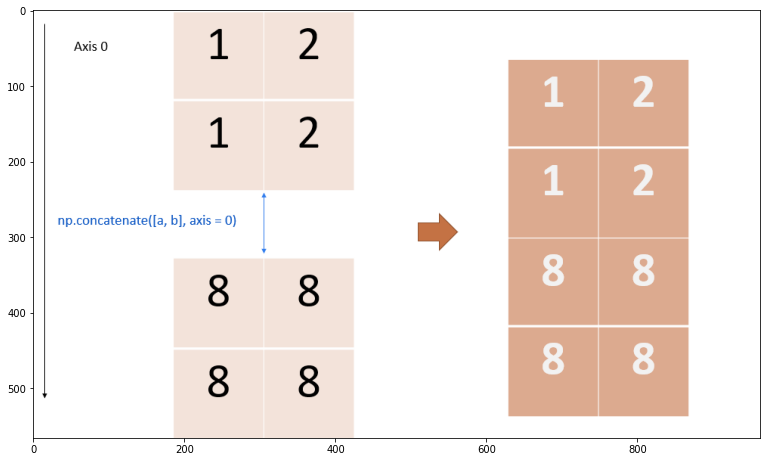

In [ ]:
img_concat0 = cv2.imread('concat0.jpg')
dpi = plt.rcParams['figure.dpi']

height, width, depth = img_concat0.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(img_concat0)

If we specify the axis = 1 for concatenation, the arrays will be stacked along the columns (they will be concatenated horizontally).



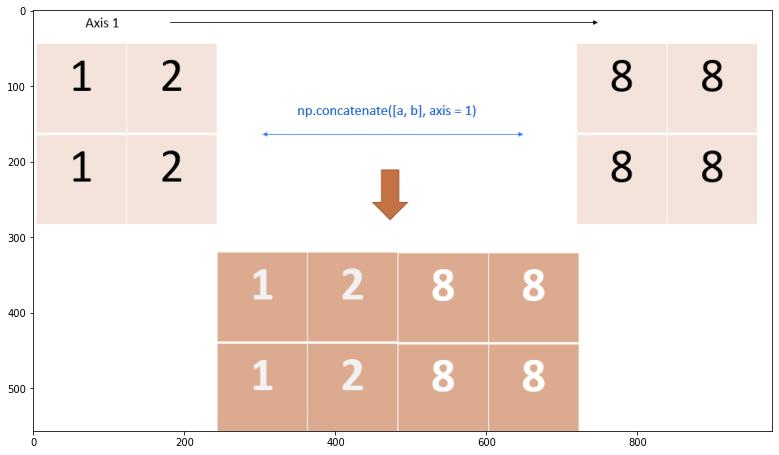

In [ ]:
img_concat1 = cv2.imread('concat1.jpg')
dpi = plt.rcParams['figure.dpi']

height, width, depth = img_concat1.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(img_concat1)

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

print('The sum of each column is: \n ', np.sum(a, axis = 0))

print('The sum of each row is: \n ', np.sum(a, axis = 1))

b = np.array([[1, 1, 1, 1], [2, 2, 2, 2]])

print('Concatenate vertically: \n', np.concatenate([a, b], axis = 0))

print('Concatenate horizontally: \n', np.concatenate([a, b], axis = 1))

The sum of each column is: 
  [ 6  8 10 12]
The sum of each row is: 
  [10 26]
Concatenate vertically: 
 [[1 2 3 4]
 [5 6 7 8]
 [1 1 1 1]
 [2 2 2 2]]
Concatenate horizontally: 
 [[1 2 3 4 1 1 1 1]
 [5 6 7 8 2 2 2 2]]


In [ ]:
# example with 1D arrays
a = np.array([0, 0, 0])
b = np.array([1, 1, 1])

print(np.concatenate([a, b], axis=0)) # attention! 1D arrays have only one axis

a = a.reshape((1, 3))
b = b[np.newaxis, :]

print(np.concatenate([a, b], axis=0))

# Good practice: reshape your arrays to (1, dim): a = a.reshape((1, 3))

[0 0 0 1 1 1]
[[0 0 0]
 [1 1 1]]


## Vectorization

"<i>Vectorization is the art of getting rid of for loops in your code.</i>" (Andrew Ng)

numpy provides a series of functions that allow the programmer to perform mathematical computations on the elements of the array without having to explicitly loop over the array elements; these functions are much more efficient as python delegates these tasks to compiled and optimized C code.
 
A formal definiton of vectorization is:
"In the context of high-level languages like Python, Matlab, and R, the term vectorization describes the use of optimized, pre-compiled code written in a low-level language (e.g. C) to perform mathematical operations over a sequence of data. This is done in place of an explicit iteration written in the native language code." (check this tutorial for details: https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html)

Using for loops to access array elements (when dealing with large data) is highly inefficient, as demonstrated in the examples below.
Therefore, especially for this course, when we'll deal with a lot of training data and large neural network architectures, you should always use vectorization when writing your code. Otherwise, it will take a very very very :) long time to get your model to perform a single iteration over your training data.

249905.4575797488
249905.45757975418
Time to compute dot product using loops:  0.6993615627288818 milliseconds
Time to compute dot product using vectorization:  0.0013623237609863281 milliseconds
Speedup  513.3592929646483


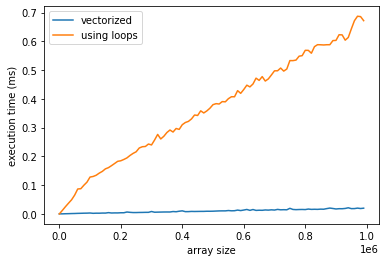

In [ ]:
import numpy as np
import time
a1 = np.random.rand(1000000)
a2 = np.random.rand(1000000)

t1 = time.time()
dp_vectorized = a1.dot(a2)
time_vectorized = time.time() - t1

t1 = time.time()
dp_loops = 0
for i in range(0, a1.shape[0]):
    dp_loops += a1[i]*a2[i]
time_loops = time.time() - t1

print(dp_vectorized)
print(dp_loops)

print('Time to compute dot product using loops: ', time_loops, 'milliseconds')
print('Time to compute dot product using vectorization: ', time_vectorized, 'milliseconds')
print('Speedup ', time_loops/time_vectorized)


arr_size = []
arr_time_vectorized = []
arr_time_loops = []



for sz in range(100, 1000000, 10000):
    t1 = time.time()
    a1 = np.random.rand(sz)
    a2 = np.random.rand(sz)
    dp_vectorized = a1.dot(a2)
    time_vectorized = time.time() - t1

    t1 = time.time()
    dp_loops = 0
    for i in range(0, a1.shape[0]):
        dp_loops += a1[i]*a2[i]
    time_loops = time.time() - t1
    arr_size.append(sz)

    arr_time_vectorized.append(time_vectorized)
    arr_time_loops.append(time_loops)


plt.plot(arr_size, arr_time_vectorized, label='vectorized')
plt.plot(arr_size, arr_time_loops, label='using loops')
plt.legend()
plt.xlabel('array size')
plt.ylabel('execution time (ms)')
plt.show()

## Broadcasting

Broadcasting is a *numpy* features that allows us to perfom operations on arrays with different shapes; frequently we may need to work with arrays with different size and apply some operations on these arrays. With broadcasting, if the arrays don't have the same size, the smaller size array is "broadcast" to match the shape of the larger array. This also helps with vectorizing array operations.

To be able to broadcast, the size of the arrays in the trailing axes must be the same, or one of these dimensions must be 1.
If the arrays don't have the same rank, we add 1 dimensions to the left (prepend the shape property with ones), until the arrays have the same rank.

Always, the result of broadcasting is the maximum size along each dimension from the input arrays.

You can check this tutorial for further information: http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc 

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # shape: (3, 3)
b = np.array([0, 1, 2]) # (3,)
             
x1 = np.array([[1, 2, 3]]) # shape: (1, 3)
x2 = np.array([1, 2, 3]).reshape((3, 1)) # shape: (3, 1)

print(x1+x2)
#np.array([[1], [2], [3]) -> (3,) -> (3, 1)
# [1, 2, 1]
# [2, 4, 2]
# [1, 2, 1]
# add the two vectors using broadcasting
s = a + b
print(s)

# the code snippet above is equvalent to the code below (but without making unnecessary copies)
print(b.shape)
b_expanded = np.tile(b, (3, 1)) # this stacks 3 copies of b -> (3, 3)
print(b_expanded.shape)
print(b_expanded)
s = a + b_expanded

# add a vector to each complun of a matrix
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([0, 2])
# transpose the matrix a (a.T) such that is has shape (3, 2), the array b has shape (2,)
# they can be broadcasted together and then we can transpose the result
print((a.T+b).T)

[[2 3 4]
 [3 4 5]
 [4 5 6]]
[[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]]
(3,)
(3, 3)
[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[1 2 3]
 [6 7 8]]


In [ ]:
a = np.array([0, 1, 2, 3])
b = np.array([4, 5, 6])
print(a.shape)
print(b.shape)

try:
    print(a+b)
except ValueError:
    print('Unable to broadcast arrays with shapes ', a.shape, b.shape)
    
a = a.reshape((4, 1))
# or you might see this syntax: a = a[:, np.newaxis]
print(a.shape)
print(b.shape)
print(a+b)
print((a+b).shape)

(4,)
(3,)
Unable to broadcast arrays with shapes  (4,) (3,)
(4, 1)
(3,)
[[4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
(4, 3)


## Simple *numpy* exercise

I am sure that you were already familiar with all the concepts presented above, but a short recap is always welcomed. 

Now let's do a very simple exercise with *numpy* arrays.

In a (4, 7) *numpy* array we store the statistics about coronavirus cases in the last week in our country.
The rows specify the number of tests with a positive test result, the number of tests with a negative test result (first testing for the subject), the number of inconclusive tests and the number of fatalities, respectively. 
The columns specify the day of the week for which the statistics were reported.
    
Compute the following (without using any explicity for loop):
- the total number of tests performed each day
- the percentage of daily positive tests and the percentage of daily inconclusive tests (as an array with 2 rows and 7 columns)
- the day in which the maximum number of deaths occured
- the sum of daily deaths and positive test results for each working day (the result with be an array with 5 elements)
- the number of positive tests results, the number of tests with a negative test result, the number of inconclusive tests and the number of fatalities for the week as a (1, 4) array


In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
statistics = np.array([
                      [1200, 1234, 1580, 1468, 1300, 1367, 800], # positive test results
                      [24356, 24136, 22656, 22111, 22346, 18900, 14000], # negative test results
                      [134, 100, 491, 500, 301, 200, 300],  # inconclusive tests
                      [23, 14, 15, 16, 7, 5, 1]]) # number of fatalities

#the total number of tests performed each day
totalNumberOfTests = np.add(np.add(statistics[0, :], statistics[1, :]), statistics[2, :])
print("The total number of tests performed each day is: \n", totalNumberOfTests)

#the percentage of daily positive tests and the percentage of daily inconclusive tests (as an array with 2 rows and 7 columns)

# get an array of total tests made for each day of the week in order to compute easier the percentage
totalTestsArray = np.array([
    np.sum(statistics[:3, 0]),
    np.sum(statistics[:3, 1]),
    np.sum(statistics[:3, 2]),
    np.sum(statistics[:3, 3]),
    np.sum(statistics[:3, 4]),
    np.sum(statistics[:3, 5]),
    np.sum(statistics[:3, 6])
])
# get an array with all positive tests
positiveTests = statistics[0, :]
# get an array with all inconclusive tests
inconclusiveTests = statistics[2, :]
# multiply each array element with 100, in order to compute the average
positiveTests = np.multiply(positiveTests,  np.array(100))
inconclusiveTests = np.multiply(inconclusiveTests, np.array(100))
# divide each value by total number of tests => (positiveNoOfTests*100)/totalNoOfTests
thePercentageOfPositiveTests = np.divide(positiveTests, totalTestsArray)
thePercentageOfInconclusiveTests = np.divide(inconclusiveTests, totalTestsArray)
# print the result as an array with 2 rows and 7 columns
print("The percentage of daily positive tests and the percentage of daily inconclusive tests: ",
      np.array([thePercentageOfPositiveTests, thePercentageOfInconclusiveTests]))


#the day in which the maximum number of deaths occured

# np.argmax - returns the index of the max value from array
# optional when the array has rank 2 or greater the axis should be provided
maxValueIndex = np.argmax(statistics[3, :])
print("The day in which the maximum number of deaths occurred is: " , days[maxValueIndex])

#the sum of daily deaths and positive test results for each working day (the result with be an array with 5 elements)

# we perform an elementwise add operation between the array of daily positive test (position
# 0 in statistics) results and daily deaths (position 3 in statistics), and we go until :5 -
# only working days
sumResult =  np.array([
    np.add(statistics[0, :5], statistics[3, :5])
])
print("The sum of daily deaths and positive test results for each working day is: ", sumResult)

#the number of positive tests results, the number of tests with a negative test result, the number of inconclusive tests and the number of fatalities for the week as a (1, 4) array

totalWeekResult = np.array([
    np.sum(statistics[0, :]),
    np.sum(statistics[1, :]),
    np.sum(statistics[2, :]),
    np.sum(statistics[3, :])
])
print("The number of positive tests results, the number of tests with a negative test result, "
      "the number of inconclusive tests and the number of fatalities for the week: ", totalWeekResult)


The total number of tests performed each day is: 
 [25690 25470 24727 24079 23947 20467 15100]
The percentage of daily positive tests and the percentage of daily inconclusive tests:  [[4.67107824 4.84491559 6.38977636 6.0965987  5.42865495 6.67904432
  5.29801325]
 [0.52160374 0.39261877 1.98568367 2.07649819 1.25694241 0.97718278
  1.98675497]]
The day in which the maximum number of deaths occurred is:  Monday
The sum of daily deaths and positive test results for each working day is:  [[1223 1248 1595 1484 1307]]
The number of positive tests results, the number of tests with a negative test result, the number of inconclusive tests and the number of fatalities for the week:  [  8949 148505   2026     81]


Expected output:

The total number of tests performed each day is:
[25690 25470 24727 24079 23947 20467 15100]

The percentage of daily positive tests and the percentage of daily inconclusive tests:
[[4.67107824 4.84491559 6.38977636 6.0965987  5.42865495 6.67904432
  5.29801325]
 [0.52160374 0.39261877 1.98568367 2.07649819 1.25694241 0.97718278
  1.98675497]]

The day in which the maximum number of deaths occured is:
Monday

The sum of daily deaths and positive test results for each working day is: 
[[1223 1248 1595 1484 1307]]

The number of positive tests results, the number of tests with a negative test result, the number of inconclusive tests and the number of fatalities for the week: 
[[  8949 148505   2026     81]]

# Plotting

During this course we'll frequently create plots to show the distribution of some data, to show the performance of the developed models etc. We'll use the *matplotlib* library for this.

Using this library is straightforward, and the function that we'll use the most is plot(). You can check more about this library in the documentation: https://matplotlib.org/3.3.1/contents.html .

For example, to display a sine wave we could do the following:

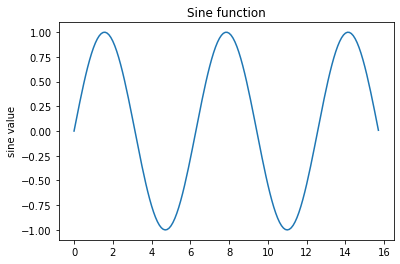

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# compute the x range
x = np.arange(0, 5 * np.pi, 0.1)
y = np.sin(x)

plt.plot(x, y)

# set the title and the name of the x and y axes
plt.title('Sine function')
plt.ylabel('sine value')

# show the figure
plt.show()

We can plot different data in the same plot using subplot. Below is an example:

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]


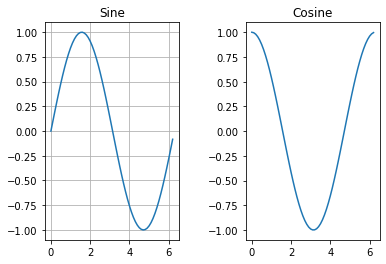

In [ ]:
# compute the x range 
x = np.arange(0, 2 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# subplot with 1 row and 2 columns
# the first subplot is the active one
plt.subplot(1, 2, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.grid(True)
plt.title('Sine')

# activate the second plot
plt.subplot(1, 2, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# adjust the spacing between the plots
plt.subplots_adjust(wspace=0.5)
plt.show()

You might be familiar from the Artificial Intelligence class with some of the activation functions used in neural networks: ReLU, tahh, sigmoid and their friends. In the image below you have the common activation functions depicted as dance moves.




Pick your favourite three "dance moves" and plot them with matplotlib using subplots. 

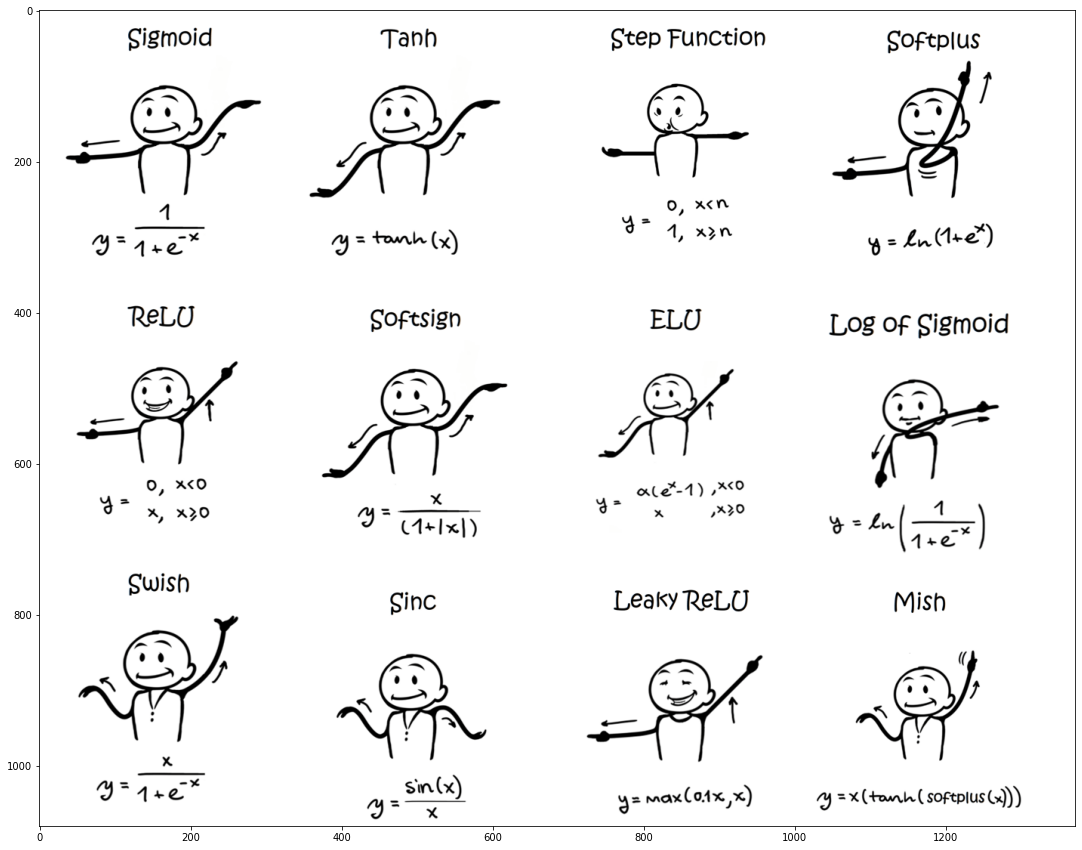

In [ ]:

dance_moves_img = cv2.imread('dance_moves.png')
dpi = plt.rcParams['figure.dpi']

height, width, depth = dance_moves_img.shape
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)
plt.imshow(dance_moves_img)

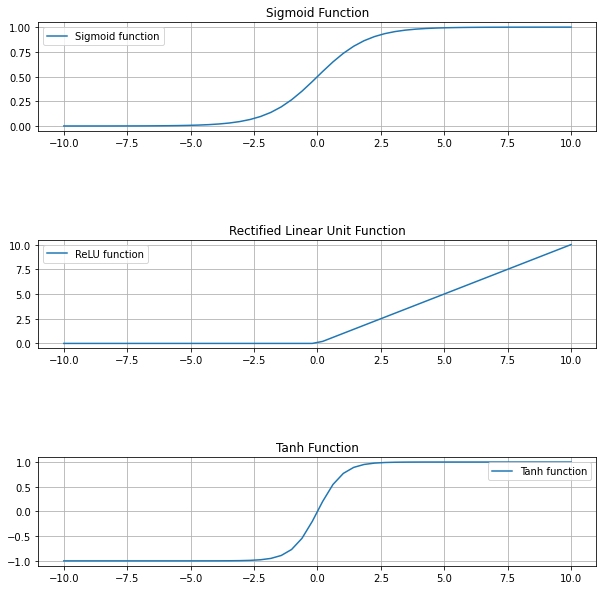

In [ ]:
## YOUR CODE HERE

"""
Sigmoid
The main reason why we use sigmoid function is because it exists between (0 to 1). 
Therefore, it is especially used for models where we have to predict the probability as 
an output.Since probability of anything exists only between the range of 0 and 1, 
sigmoid is the right choice.
"""
plt.figure(figsize=(10, 10))
x = np.linspace(-10, 10)
y = 1 / (1 + np.exp(-x))
plt.subplot(3,1,1)

#plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(x, y)
plt.legend(['Sigmoid function'])
plt.title('Sigmoid Function')
#plt.show()

"""
ReLU - Rectified Linear Unit
The ReLU is the most used activation function in the world right now.Since, it is used in almost 
all the convolutional neural networks or deep learning.
f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.
Range: [ 0 to infinity)
The function and its derivative both are monotonic.
But the issue is that all the negative values become zero immediately which decreases the ability 
of the model to fit or train from the data properly. That means any negative input given to the ReLU 
activation function turns the value into zero immediately in the graph, which in turns affects the 
resulting graph by not mapping the negative values appropriately.
"""

x = np.linspace(-10, 10)
y = np.maximum(0, x)

plt.subplot(3,1,2)
#plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(x, y)
plt.legend(['ReLU function'])
plt.title('Rectified Linear Unit Function')
#plt.show()


"""
Tanh
Tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). 
Tanh is also sigmoidal (s - shaped).
The advantage is that the negative inputs will be mapped strongly negative and the zero inputs 
will be mapped near zero in the tanh graph.
"""

x = np.linspace(-10, 10)
y = ( 2 / (1 + np.exp(-2*x) ) ) -1

plt.subplot(3,1,3)
#plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(x, y)
plt.legend(['Tanh function'])
plt.title('Tanh Function')

plt.subplots_adjust(hspace=1)

plt.show()


# Image manipulation

Computer vision is about images (or image sequences), so you'll definetely need some image manipulation skills.
For now, we'll just need some functions to read and write images. 

We'll use the *opencv* library to work images; opencv is an open-source, cross-platform computer vision library and it support a variety of programming languages (C++, Python, Java).

The python version of opencv is very simple and it allows you to express your brilliant ideas in fewer line of codes, while maintaining a hight readability of the code.

### Reading, writing and displaying an image

To read an image you'll use the <i>imread</i> function from the opencv library. To display an image you can use the <i>imshow</i> function from the matplolib library . 
Pretty simple, isn't it? 

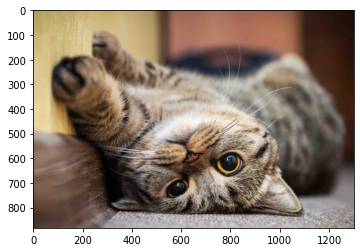

In [ ]:
img = cv2.imread('cute_cat.jpg') # BGR , RGB
# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # opencv uses BGR channel ordering, while matplotlib uses RGB channel ordering

plt.imshow(img)


An image is esentially just a numpy array. The type of the elements stored in this array is np.uint8, so each element ranges from 0 (corresponding to the black color in grayscale images) and 255 (corresponding to the white color in grayscale images).

To get the size of the image, we can use the <i>size</i> attribute.

In [ ]:
img_height, img_width, img_channels = img.shape[0], img.shape[1], img.shape[2]
print('The image resolution is ', img_width, 'x', img_height)
print('The number of channels is ', img_channels)

The image resolution is  1300 x 882
The number of channels is  3


You can use the function imresize to change the resolution of an image.

The shape of the resize image is: (400, 120, 3)


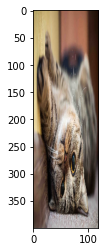

In [ ]:
# resize image to (120, 400) - breaks the aspect ratio
img_resize_fixed =  cv2.resize(img, (120, 400))
print('The shape of the resize image is:', img_resize_fixed.shape)
plt.imshow(img_resize_fixed)


The shape of the resize image is: (220, 325, 3)


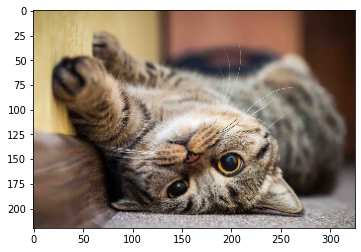

In [ ]:
# resize the image to w/4 x h/4 (keeps the aspect ratio)
img_resize_prop = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
print('The shape of the resize image is:', img_resize_prop.shape)
plt.imshow(img_resize_prop)

A color image consists of 3 image channels (the red, green and blue channels).

A grayscale image has a single channel. One way of converting a color image to grayscale is using the equation:

Gray = 0.2126 R + 0.7152 G + 0.0722 B

,where R, G and B are the red, green and blue channels of the input image.

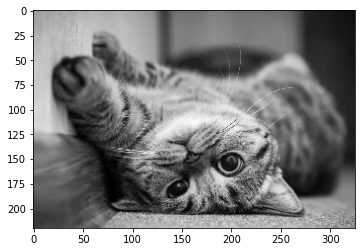

In [ ]:
img_gray = 0.2126*img_resize_prop[:,:,0] + 0.7152*img_resize_prop[:,:,1] + 0.0722*img_resize_prop[:,:,2]
img_gray = img_gray.astype(np.uint8)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255) # use cmap='gray' (colormap) to display a grayscale image

A histogram is graphical representation of the grayscale values (or color tones in the input image). From a histogram we can determine statistical properties of the image, such as the average brightness and the contrast of the image.


The histogram is:
 [  4  30 223  37 107  59 182  75 123 144  92 103 191 196 199 157 176 164
 218 219 295 413 239 242 269 342 220 438 355 240 220 544 408 373 668 384
 263 285 509 365 278 482 371 281 235 337 329 263 340 268 333 278 287 322
 326 359 406 330 336 336 315 341 442 394 316 369 441 453 410 381 441 405
 355 405 430 362 381 386 353 291 300 351 325 320 292 358 280 299 316 320
 302 375 335 369 356 409 366 374 346 327 322 377 342 339 318 323 329 297
 319 299 403 290 310 346 453 382 413 414 312 339 518 407 361 630 489 368
 399   0 664 594 374 515 508 335 285 328 405 264 263 370 257 239 246 232
 236 221 270 257 226 264 251 246 280 304 256 274 333 311 295 273 382 335
 369 405 379 343 350 376 350 397 473 407 351 341 426 453 373 423 455 407
 387 541 540 399 464 514 419 373 476 558 414 372 410 352 267 269 403 299
 246 345 238 208 245 300 234 240 207 145 117 141 152 148 161 189 149 109
  94 180 103  85  90  56  66  56  52  48  55  71  65  54  56  52  82  61
  45  41  32  26  40  47  26  26

Text(0.5, 1.0, 'histogram of the grayscale image')

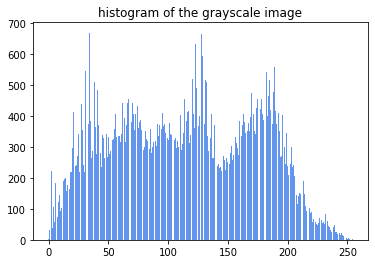

In [ ]:
hist, bins = np.histogram(img_gray, bins=255)# [0-255], 256

print('The histogram is:\n', hist)

plt.bar(np.arange(255), hist, color='cornflowerblue')
plt.title('histogram of the grayscale image')

Plot the histograms of the red, blue and green channel of an image on the same plot. The histogram of the red channel should be displayed in red bars, the histogram of the blue channel should be displayed in blue bars and the histogram of the green channel should be displayed with green bars.

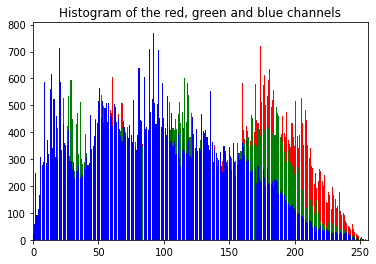

In [ ]:
## YOUR CODE HERE
img_cat = cv2.imread('cute_cat.jpg')
img_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)
img_cat = cv2.resize(img_cat, (0,0), fx = 0.25, fy = 0.25)
hist, bins = np.histogram(img_cat[:,:,0], bins=255)
plt.xlim([0, 256])
#plt.subplot(3, 1, 1)
plt.bar(np.arange(255), hist, color='red')
#plt.title('Histogram of the red channel')

hist, bins = np.histogram(img_cat[:,:,1], bins=255)
#plt.subplot(3, 1, 2)
plt.bar(np.arange(255), hist, color='green')
#plt.title('Histogram of the green channel')

hist, bins = np.histogram(img_cat[:,:,2], bins=255)
#plt.subplot(3, 1, 3)
plt.bar(np.arange(255), hist, color='blue')
#plt.title('Histogram of the blue channel')

#plt.subplots_adjust(hspace=0.7)
plt.title('Histogram of the red, green and blue channels')
plt.show()

Add to each element in the grayscale image with a positive number and store the result in img_l1. 
What do you think is the effect of this operation? Display the image img_l1. Make sure that the result is in the range [0, 255].

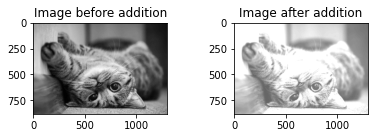

In [ ]:
# YOUR CODE THERE
number = 100
img = cv2.imread('cute_cat.jpg')
# BGR to RGB
img_cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray_cat = 0.2126 * img_cat[:, :, 0] + 0.7152 * img_cat[: , :, 1] + 0.0722 * img_cat[:, :, 2]
img_l1 = np.clip(img_gray_cat + number, 0, 255)
img_l1 =  img_l1.astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(img_gray_cat, cmap= 'gray', vmin=0, vmax=255)
plt.title('Image before addition')
plt.subplot(1,2,2)
plt.imshow(img_l1, cmap= 'gray', vmin=0, vmax=255)
plt.title('Image after addition')
plt.subplots_adjust(wspace=0.5)
plt.show()
# The image gets brighter after the addition

Compute and display the histogram of img_l1.  What do you notice? How is this histogram different than the previous one?

Histogram before addition: 
 [  285   848  3643   936  1133  1684  2604  1883  1905  1946  1797  2131
  2630  3496  3265  2415  2811  2587  3883  3853  4987  6495  3768  3930
  4721  5364  3789  6927  5789  3696  3809  8991  6587  6246 10606  5343
  4280  4500  8306  5763  4880  7750  5950  4565  4143  5676  4748  4531
  4967  4663  4837  4693  4599  4798  5180  5834  6839  5179  5330  5255
  5255  5787  7293  5871  5311  5858  6759  6624  6376  6656  6598  6327
  5897  6235  6583  5980  6173  6097  5290  4994  5159  5644  5078  5299
  5130  4800  4900  4697  4989  5097  5187  5522  5194  5084  5650  6018
  5718  6104  5665  5212  5027  5681  5650  5210  5470  5200  5173  4978
  4885  5338  5725  4837  4780  6056  6924  5473  6559  6662  5194  5483
  7754  6451  6053 10015  7884  5710  6705 10590  9556  6167  8388  7964
  4893  4290  5316  6067  3829  4085  5681  4109  3934  3936  3934  3681
  3831  3901  4033  3887  4130  3864  3830  3973  4661  4571  4418  5078
  4827  4426  4683  54

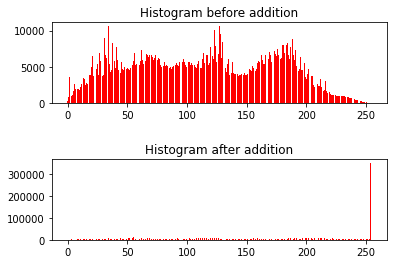

In [ ]:
## YOUR CODE HERE
hist, bins = np.histogram(img_gray_cat, bins=255)
print("Histogram before addition: \n", hist)
plt.subplot(2, 1, 1)
plt.title('Histogram before addition')
plt.bar(np.arange(255), hist, color='red')

hist, bins = np.histogram(img_l1, bins=255)
print("Histogram after addition: \n", hist)
plt.subplot(2, 1, 2)
plt.title('Histogram after addition')
plt.bar(np.arange(255), hist, color='red')
plt.subplots_adjust(hspace=0.7)
plt.show()

# The histogram is shifted to the right

Now add to the grayscale image a negative number and store the result in img_l2. 
If the resulting value is less than 0, clamp it to this 0.

What do you think is the effect of this operation?

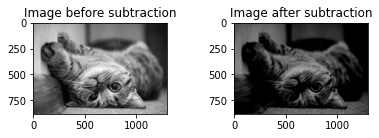

In [ ]:
## YOUR CODE HERE
number = 80
img = cv2.imread('cute_cat.jpg')
# BGR to RGB
img_cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray_cat = 0.2126 * img_cat[:, :, 0] + 0.7152 * img_cat[: , :, 1] + 0.0722 * img_cat[:, :, 2]
img_l2 = np.clip(img_gray_cat - number, 0, 255)
img_l2 = img_l2.astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(img_gray_cat, cmap= 'gray', vmin=0, vmax=255)
plt.title('Image before subtraction')
plt.subplot(1,2,2)
plt.imshow(img_l2, cmap= 'gray', vmin=0, vmax=255)
plt.title('Image after subtraction')
plt.subplots_adjust(wspace=0.5)
plt.show()
# The image gets darker after the subtraction

Compute and display the histogram of img_l2. What do you notice? How is this histogram different than the previous ones?

Histogram before subtraction: 
 [  285   848  3643   936  1133  1684  2604  1883  1905  1946  1797  2131
  2630  3496  3265  2415  2811  2587  3883  3853  4987  6495  3768  3930
  4721  5364  3789  6927  5789  3696  3809  8991  6587  6246 10606  5343
  4280  4500  8306  5763  4880  7750  5950  4565  4143  5676  4748  4531
  4967  4663  4837  4693  4599  4798  5180  5834  6839  5179  5330  5255
  5255  5787  7293  5871  5311  5858  6759  6624  6376  6656  6598  6327
  5897  6235  6583  5980  6173  6097  5290  4994  5159  5644  5078  5299
  5130  4800  4900  4697  4989  5097  5187  5522  5194  5084  5650  6018
  5718  6104  5665  5212  5027  5681  5650  5210  5470  5200  5173  4978
  4885  5338  5725  4837  4780  6056  6924  5473  6559  6662  5194  5483
  7754  6451  6053 10015  7884  5710  6705 10590  9556  6167  8388  7964
  4893  4290  5316  6067  3829  4085  5681  4109  3934  3936  3934  3681
  3831  3901  4033  3887  4130  3864  3830  3973  4661  4571  4418  5078
  4827  4426  4683 

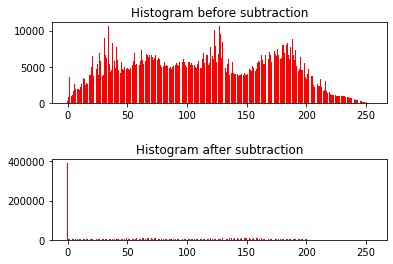

In [ ]:
## YOUR CODE HERE
hist, bins = np.histogram(img_gray_cat, bins=255)
print("Histogram before subtraction: \n", hist)
plt.subplot(2, 1, 1)
plt.title('Histogram before subtraction')
plt.bar(np.arange(255), hist, color='red')

hist, bins = np.histogram(img_l2, bins=255)
print("Histogram after subtraction: \n", hist)
plt.subplot(2, 1, 2)
plt.title('Histogram after subtraction')
plt.bar(np.arange(255), hist, color='red')
plt.subplots_adjust(hspace=0.7)
plt.show()

# The histogram is shifted to the left according to the subtracted number


Add a positive number (for example 40) to the red channel of the color image and store the result in imgg. If the result of the addition exceeds 255, clamp it to 255.
What do you think is the effect of this operation?
Display the resulting image imgr.

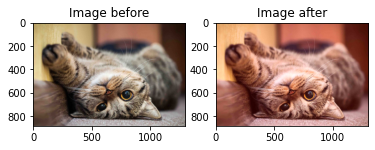

In [ ]:
## YOUR CODE HERE
img = cv2.imread('cute_cat.jpg')
# BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.title('Image before')
plt.imshow(img)
img = cv2.imread('cute_cat.jpg')
# BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_red = img + np.array([40, 0, 0])
img_red = np.clip(img_red, 0, 255)
cv2.imwrite('imgg.png', img_red)
plt.subplot(1, 2, 2)
plt.title('Image after')
plt.imshow(img_red)
plt.show()

# makes the image reddish

Display a region of interest from the input image defined by the rectangle (x=350, y=400, sz=(500x400)). 

Hint: an image is just a numpy array, so you can easily achieve this with array slicing.

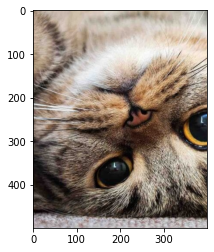

In [ ]:
## YOUR CODE HERE
img = cv2.imread('cute_cat.jpg')
# BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x = 350
y = 400
sz = (500, 400)
img = img[x:x+sz[0], y:y+sz[1], :]
plt.imshow(img)
plt.show()

# Hello convolutional neural networks !

In the last part of this introductory laboratory, you'll "meet" a convolutional network for object classification. For now, consider it just as a black box that takes an image as input and outputs the 3-top predictions; however this network requires that the input data has the following properties:
- the size of the input image must be 224x224
- the channels of the image should be stored in BGR format
- the type of the data (of the numpy array) is float32
- the values  [103.939, 116.779, 123.68] (BGR mean) should be subtracted from each pixel of the array
- prior to feeding the image to model.predict() should be added such that the shape of the image is (1, 224, 224, 3)

Your task is to pre-process the input images such that they are in the format requested by the network. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import decode_predictions

model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 3s 0us/step


In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1X9au_JCNv4fg2Wgsr4DFT-N0OZht6Zmp" -O elephant.jpg

--2022-01-10 16:57:45--  https://docs.google.com/uc?export=download&id=1X9au_JCNv4fg2Wgsr4DFT-N0OZht6Zmp
Resolving docs.google.com (docs.google.com)... 142.250.157.139, 142.250.157.113, 142.250.157.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d051lt51d2hkujugo9b45nus9ht3o0jr/1641833850000/02075498819312407694/*/1X9au_JCNv4fg2Wgsr4DFT-N0OZht6Zmp?e=download [following]
--2022-01-10 16:57:46--  https://doc-00-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d051lt51d2hkujugo9b45nus9ht3o0jr/1641833850000/02075498819312407694/*/1X9au_JCNv4fg2Wgsr4DFT-N0OZht6Zmp?e=download
Resolving doc-00-38-docs.googleusercontent.com (doc-00-38-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-00-38-docs.googleusercontent.com (doc-00

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

img_path = './elephant.jpg'

im = cv2.imread(img_path)

## TODO YOUR CODE HERE
# image is stored in BGR format
im = img.astype(np.float32)
img_resized = cv2.resize(im, (224, 224))
img_resized = img_resized - np.array([103.939, 116.779, 123.68])
img_resized = img_resized[np.newaxis, :, :, :]

preds = model.predict(img_resized)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
predictions = decode_predictions(preds, top=3)[0]
print('The top 3 predictions are: ')
for pred in predictions:
    print('\t %s with probability %0.2f%%'% (pred[1], float(pred[2])*100))

49152/35363 [=========================================] - 0s 0us/step
The top 3 predictions are: 
	 snow_leopard with probability 71.11%
	 tiger_cat with probability 8.51%
	 lynx with probability 4.37%


Apply different effects (crop it, lower the contrast, change the brightness) on the training image and see if you can "fool" the network.

Also, upload other images from your computer and see what the network predicts

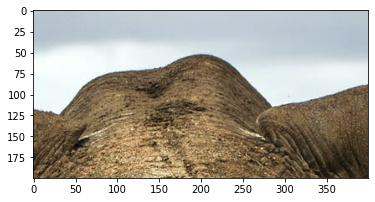

The top 3 predictions are: 
	 tusker with probability 24.89%
	 African_elephant with probability 24.63%
	 Indian_elephant with probability 18.61%


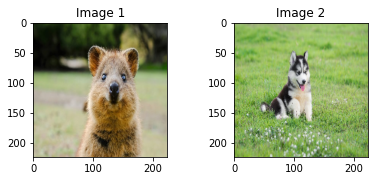

The top 3 predictions for image 1 are: 
	 brown_bear with probability 55.64%
	 hyena with probability 30.82%
	 wallaby with probability 5.18%
The top 3 predictions for image 2 are: 
	 Eskimo_dog with probability 58.70%
	 Siberian_husky with probability 23.98%
	 malamute with probability 17.05%


In [ ]:
## TODO your experiments here
img_path = './elephant.jpg'
img = cv2.imread(img_path)

img = img[0:200, 400:800, :]
img = np.clip(img, 0, 255)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img = img.astype(np.float32)
img_resized = cv2.resize(img, (224, 224))
img_resized = img_resized - np.array([103.939, 116.779, 123.68])
img_resized = img_resized[np.newaxis, :, :, :]

preds = model.predict(img_resized)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
predictions = decode_predictions(preds, top=3)[0]
print('The top 3 predictions are: ')
for pred in predictions:
    print('\t %s with probability %0.2f%%'% (pred[1], float(pred[2])*100))


# test with some images from my computer
img1 = cv2.imread('./cuteanimal1.jpg')
img2 = cv2.imread('./cuteanimal2.jpg')


img_resized1 = cv2.resize(img1, (224, 224))
img_resized2 = cv2.resize(img2, (224, 224))


plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(cv2.cvtColor(img_resized1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(cv2.cvtColor(img_resized2, cv2.COLOR_BGR2RGB))
plt.subplots_adjust(wspace=0.5)
plt.show()

img_resized2 = img_resized2.astype(np.float32)
img_resized1 = img_resized1.astype(np.float32)

img_resized2 = img_resized2 - np.array([103.939, 116.779, 123.68])
img_resized2 = img_resized2[np.newaxis, :, :, :]
img_resized1 = img_resized1 - np.array([103.939, 116.779, 123.68])
img_resized1 = img_resized1[np.newaxis, :, :, :]

preds1 = model.predict(img_resized1)
preds2 = model.predict(img_resized2)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
predictions = decode_predictions(preds1, top=3)[0]
print('The top 3 predictions for image 1 are: ')
for pred1 in predictions:
    print('\t %s with probability %0.2f%%'% (pred1[1], float(pred1[2])*100))
print('The top 3 predictions for image 2 are: ')
predictions = decode_predictions(preds2, top=3)[0]
for pred2 in predictions:
    print('\t %s with probability %0.2f%%' % (pred2[1], float(pred2[2]) * 100))

Congratulations for reaching this point! This is the end of first laboratory.
Next time we'll build (from scratch) a simple linear classifier to recognize different objects from images.

It would be great if you could tell me what you liked (or not) about this tutorial, so I can make it better for the next iteration! [feedback form](https://docs.google.com/forms/d/1hh3qUKsbVtKnRb2SS_bY7o52jf5O8n4-N6icuBv3F1k/)
Thank you!